In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
from parcer import *
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [39]:
columns=[i for i in open('labels.txt', encoding='UTF-8').read().split('\n')]
data = []

In [40]:
for file in get_valid_coords(get_coords()):
    df = pd.read_csv(f'srock8/{file[0]}', na_values=np.nan)
    df = df.ffill()
    df = df.bfill()
    df['Широта'] = file[1][0]
    df['Долгота'] = file[1][1]
    df['Высота над уровнем моря'] = file[1][2]
    data.append(df.iloc[:df.shape[0] // 800])
    
    if len(data) == 30:
        break

In [41]:
data = pd.concat(data)

In [42]:
X = np.array([data['Год по Гринвичу'].to_numpy(),
     data['Месяц по Гринвичу'].to_numpy(),
     data['День по Гринвичу'].to_numpy(),
     data['Срок по Гринвичу'].to_numpy(),
     data['Широта'].to_numpy(dtype=float),
     data['Долгота'].to_numpy(dtype=float),
     data['Высота над уровнем моря'].to_numpy(dtype=float)])


y_tempreture = data['Температура воздуха по сухому термометру'].to_numpy()
y_percipitation = data['Сумма осадков за период между сроками'].to_numpy()
y_wind = data['Средняя скорость ветра'].to_numpy()
y_humidity = data['Относительная влажность воздуха'].to_numpy()
y_press = data['Атмосферное давление на уровне станции'].to_numpy()

X = np.transpose(X)

In [44]:
y_percipitation
y_press

array([1013.1, 1013.4, 1014. , ..., 1028.8, 1028.5, 1027.3])

In [46]:
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X, y_tempreture, shuffle=True, train_size=0.2)
X_per_train, X_per_test, y_per_train, y_per_test = train_test_split(X, y_percipitation, shuffle=True, train_size=0.2)
X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X, y_wind, shuffle=True, train_size=0.2)
X_hum_train, X_hum_test, y_hum_train, y_hum_test = train_test_split(X, y_wind, shuffle=True, train_size=0.2)
X_press_train, X_press_test, y_press_train, y_press_test = train_test_split(X, y_press, shuffle=True, train_size=0.2)

In [49]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib

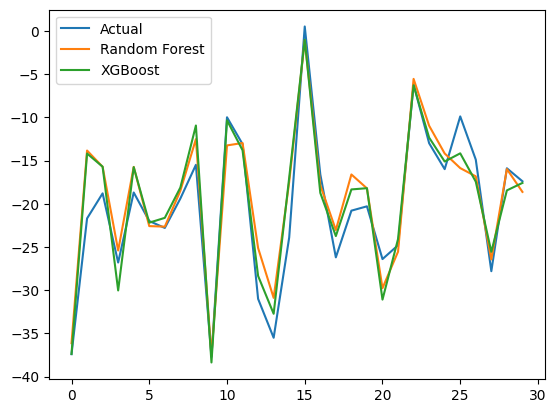

In [53]:
import matplotlib.pyplot as plt

# Fit Random Forest Regressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_temp_train, y_temp_train)

# Fit XGBoost Regressor
Xg_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05)
Xg_reg.fit(X_temp_train, y_temp_train)

# Get predictions
Xg_pred = Xg_reg.predict(X_temp_test)
pred = reg.predict(X_temp_test)

# Plot actual vs predicted values with legend names
plt.plot(y_temp_test[:30], label='Actual')
plt.plot(pred[:30], label='Random Forest')
plt.plot(Xg_pred[:30], label='XGBoost')
plt.legend()
plt.show()

In [54]:
# Save Random Forest Regressor
joblib.dump(reg, 'sklearn_models/rf_regressor_temp.pkl')

# Save XGBoost Regressor
joblib.dump(Xg_reg, 'sklearn_models/xg_regressor_temp.pkl')

['sklearn_models/xg_regressor_temp.pkl']

In [56]:
X_temp_test[:1]

array([[1.966e+03, 1.000e+00, 1.500e+01, 1.500e+01, 6.520e+01, 3.120e+01,
        1.200e+02]])